In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline

In [169]:
ordata = pd.read_csv("Country-data.csv")

In [170]:
ordata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [171]:
ordata.info() 
#Showing 167 rows of data for all variables, with no null values
#Only country is a non-numeric (object) data-type. The rest are numeric (either integer or float).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [172]:
ordata.describe()
#Checking the dataset for descriptive statistics and quantile information.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [173]:
ordata['exportsnum'] = ordata['exports']*ordata['gdpp']
ordata['importsnum'] = ordata['imports']*ordata['gdpp']
ordata['healthnum'] = ordata['health']*ordata['gdpp']
#Converting exports, imports, and health to actual numeric values, as they are originally exporessed as a percentage of gdpp

In [174]:
ordata.head() 
#Checking to see that the columns have been added

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00


In [175]:
ordata.drop(['exports'], axis = 1, inplace = True)
ordata.drop(['imports'], axis = 1, inplace = True)
ordata.drop(['health'], axis = 1, inplace = True)
#Dropping these original columns now as they are no longer needed

In [176]:
ordata.head()
#Checking to see that columns have been dropped

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74
1,Albania,16.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20
3,Angola,119.0,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00


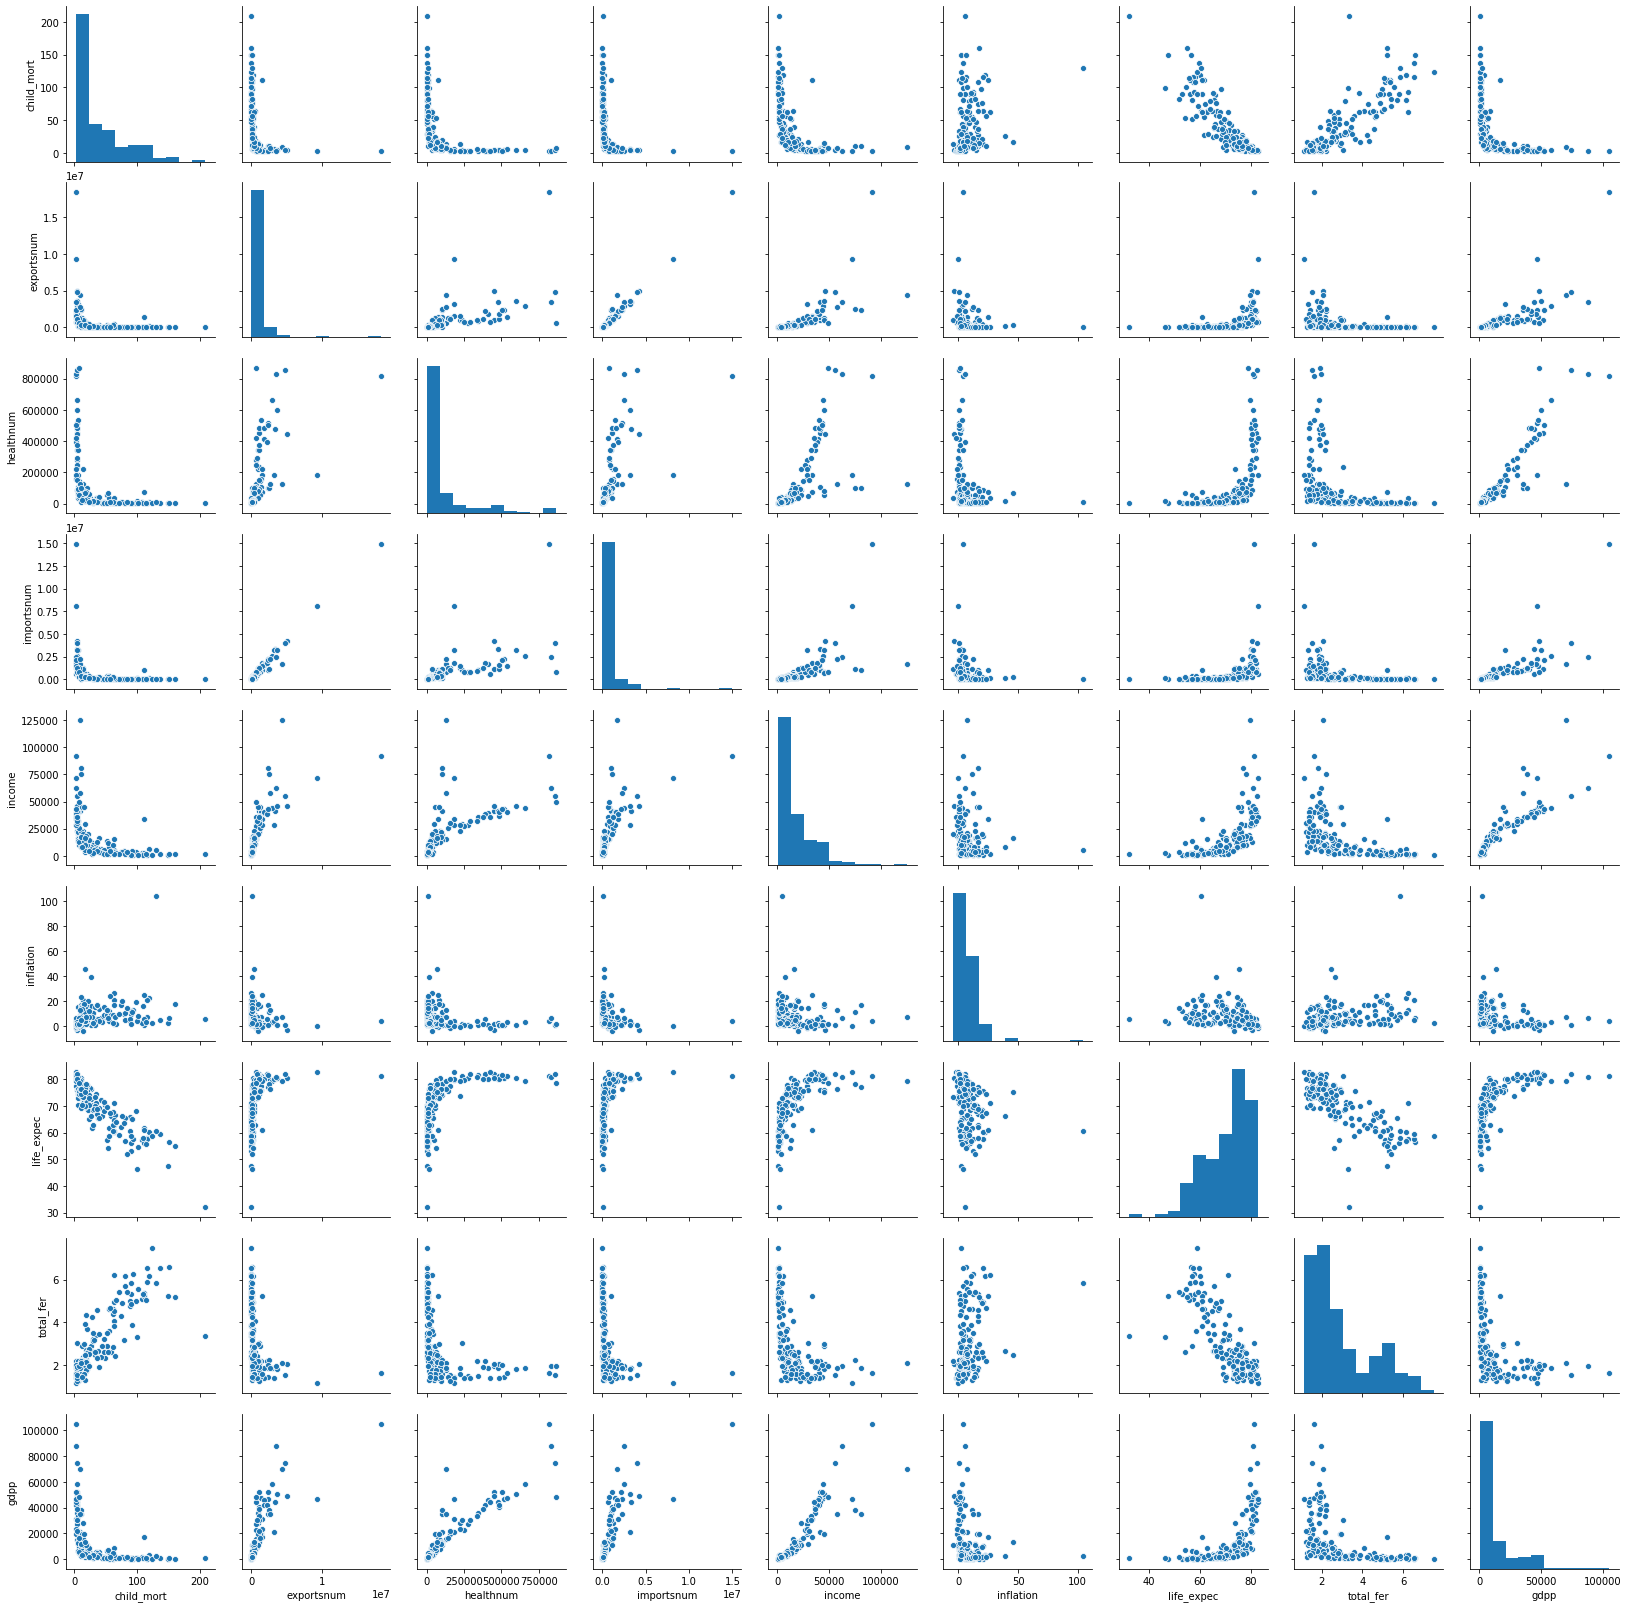

In [177]:
sns.pairplot(ordata, vars=["child_mort", "exportsnum", 'healthnum', 'importsnum', 'income', 'inflation','life_expec', 'total_fer', 'gdpp'])
plt.show()
#Performing a pairplot analysis on the quantitative data (excluded country) to look for patterns in the variables.
#Some patterns which are expected, can be observed. For instance, child mortality seems to be higher when gdpp is lower.
#Higher levels of income seem to be associated with lower child mortality.
#Life expectancy and child mortality seem to be inveresely related.


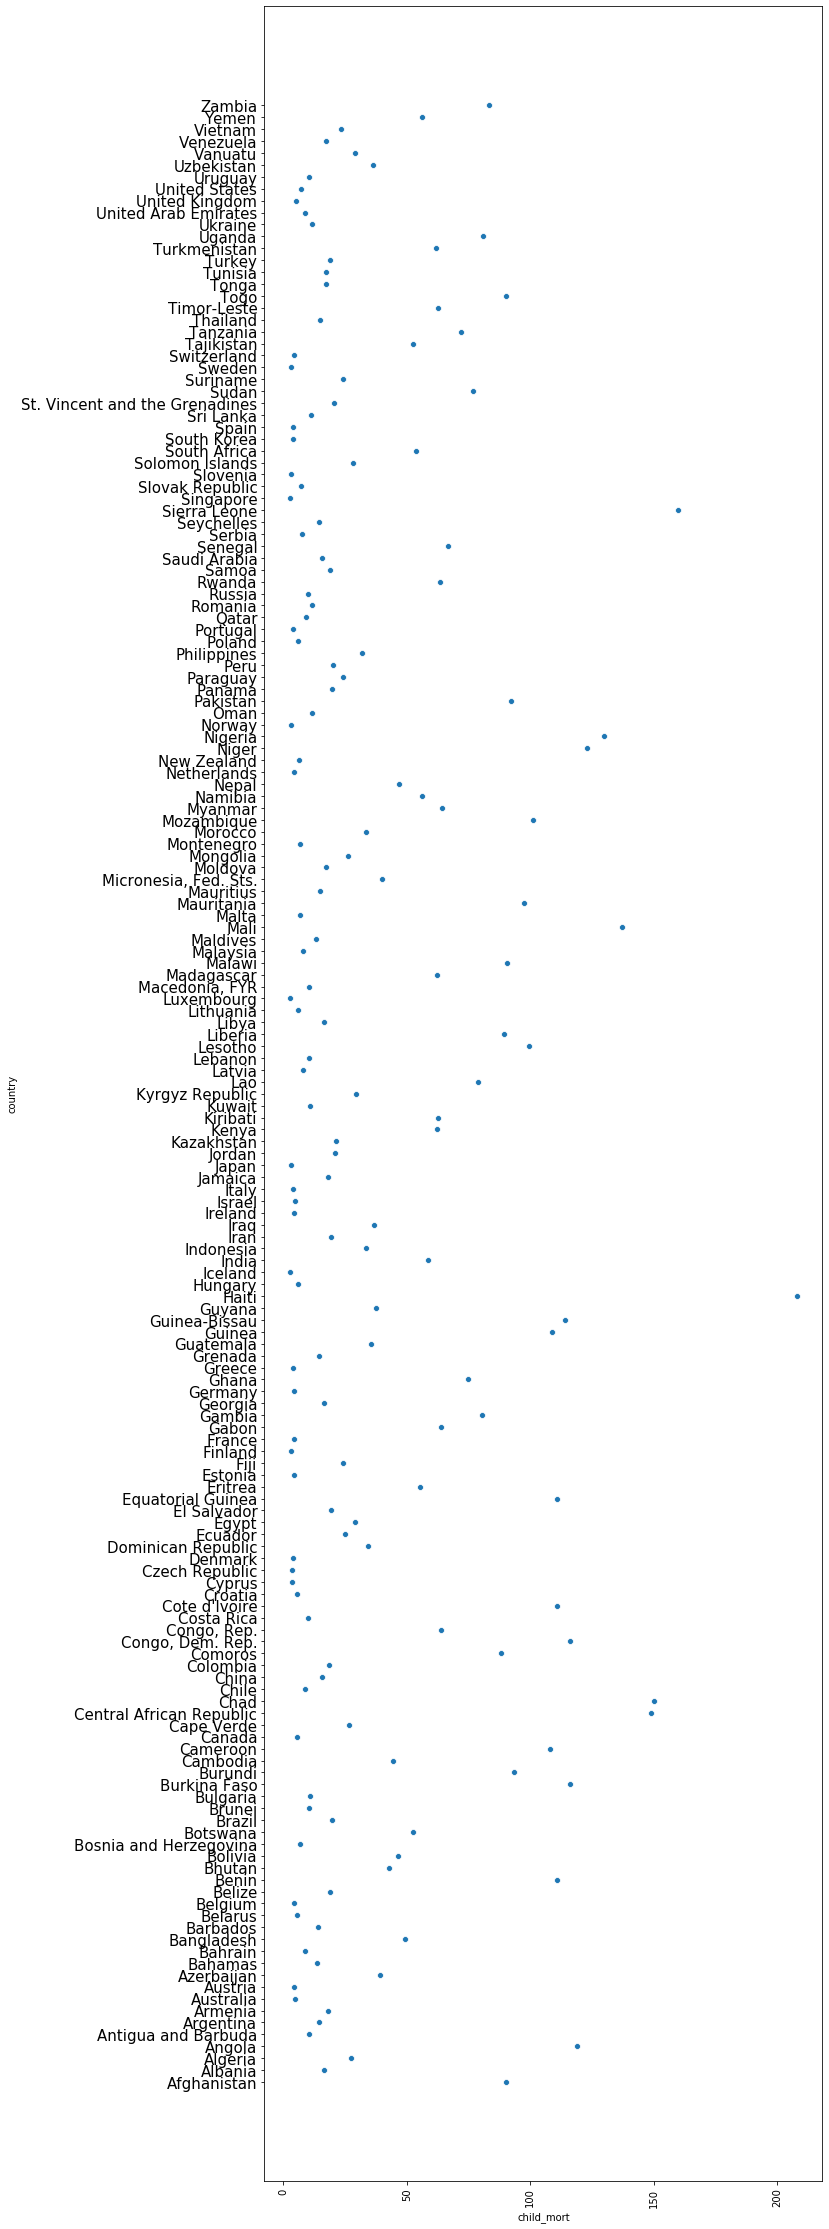

In [178]:
plt.figure(figsize = [10,40]) 
sns.scatterplot(x = 'child_mort', y = 'country', data = ordata)
plt.xticks (rotation = 90)
plt.yticks (fontsize = 15)
plt.show()
#Haiti seems to have the highest child mortality rate

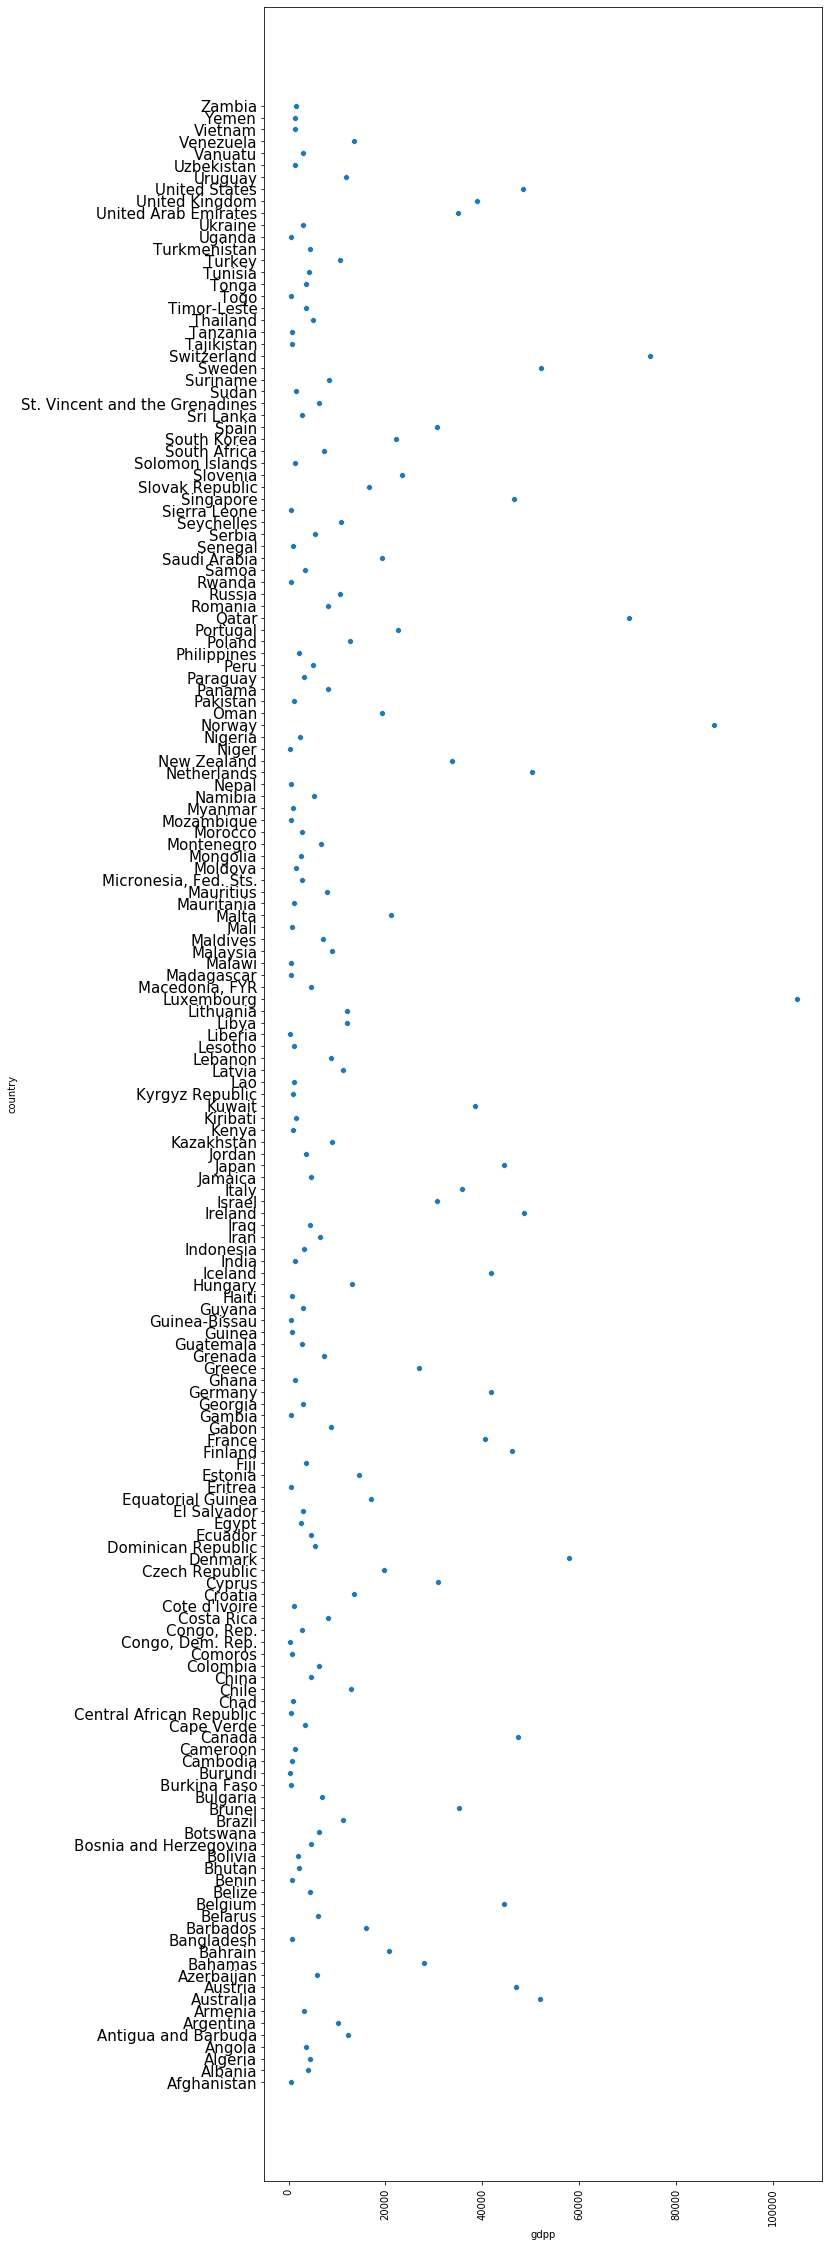

In [179]:
plt.figure(figsize = [10,40]) 
sns.scatterplot(x = 'gdpp', y = 'country', data = ordata)
plt.xticks (rotation = 90)
plt.yticks (fontsize = 15)
plt.show()
#Luxembourg seems to have the highest gdpp 

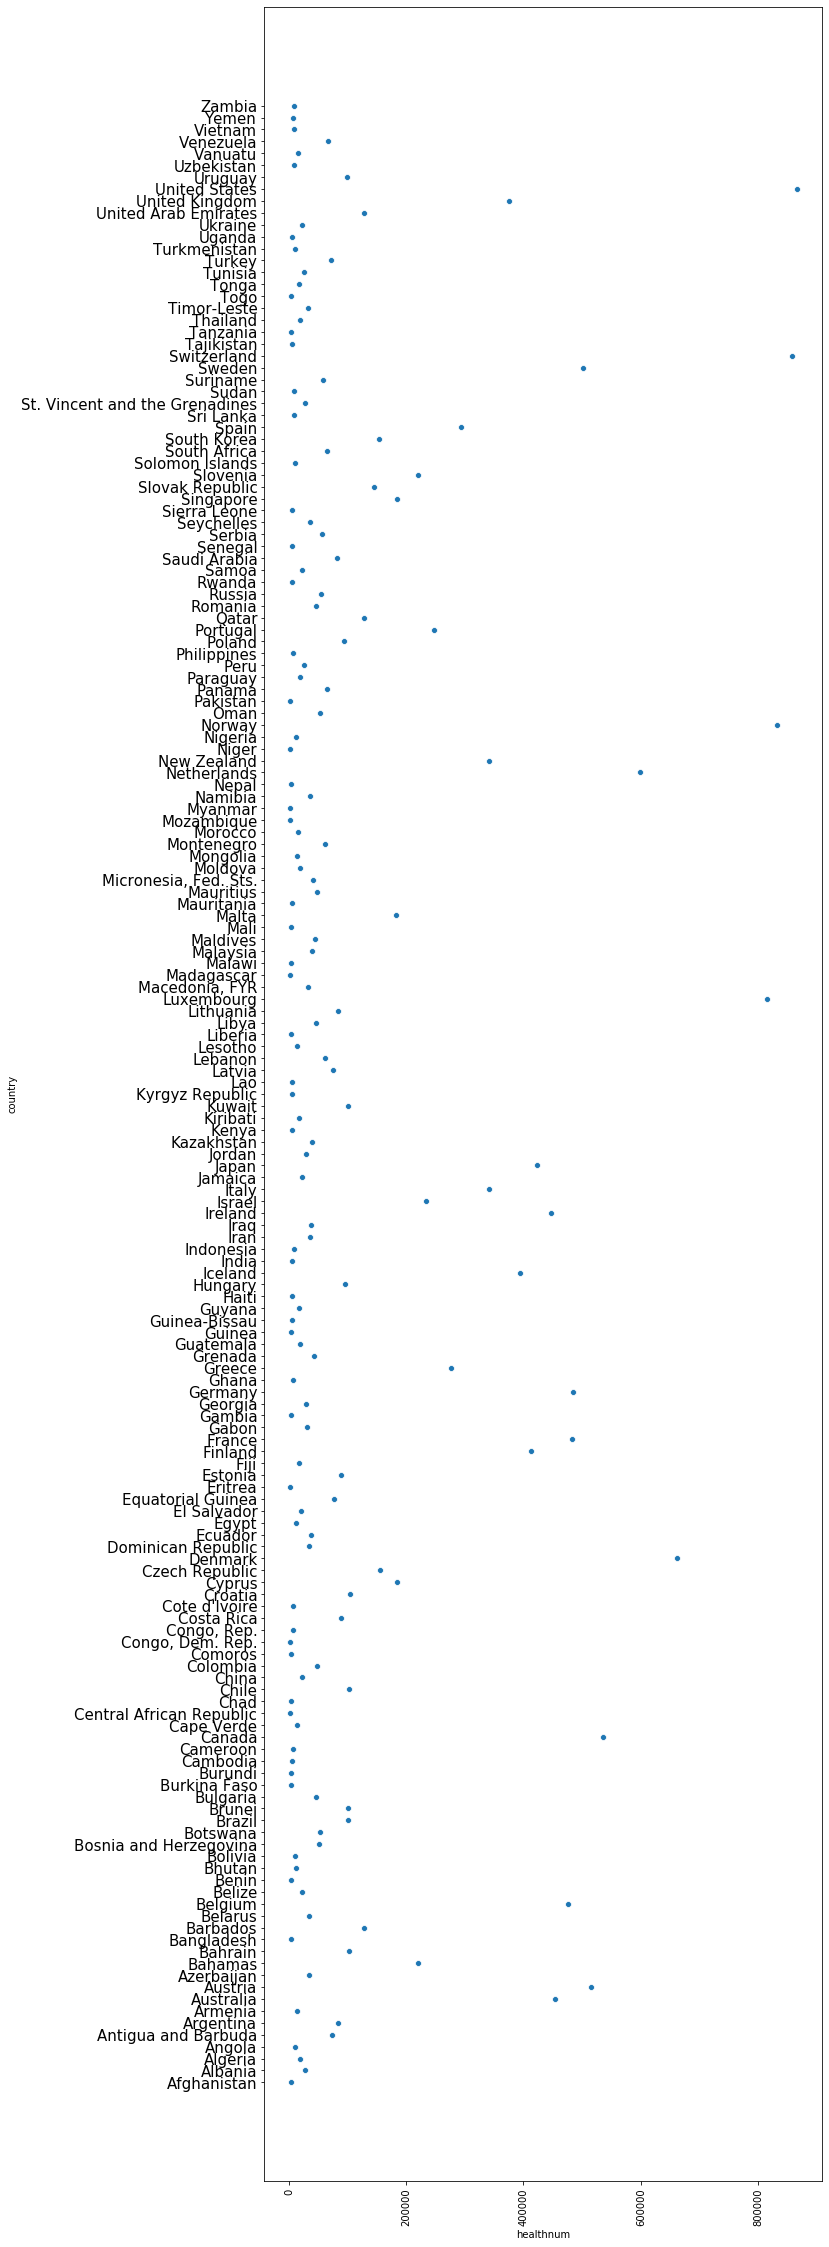

In [180]:
plt.figure(figsize = [10,40]) 
sns.scatterplot(x = 'healthnum', y = 'country', data = ordata)
plt.xticks (rotation = 90)
plt.yticks (fontsize = 15)
plt.show()
#United States spends the most on healthcare

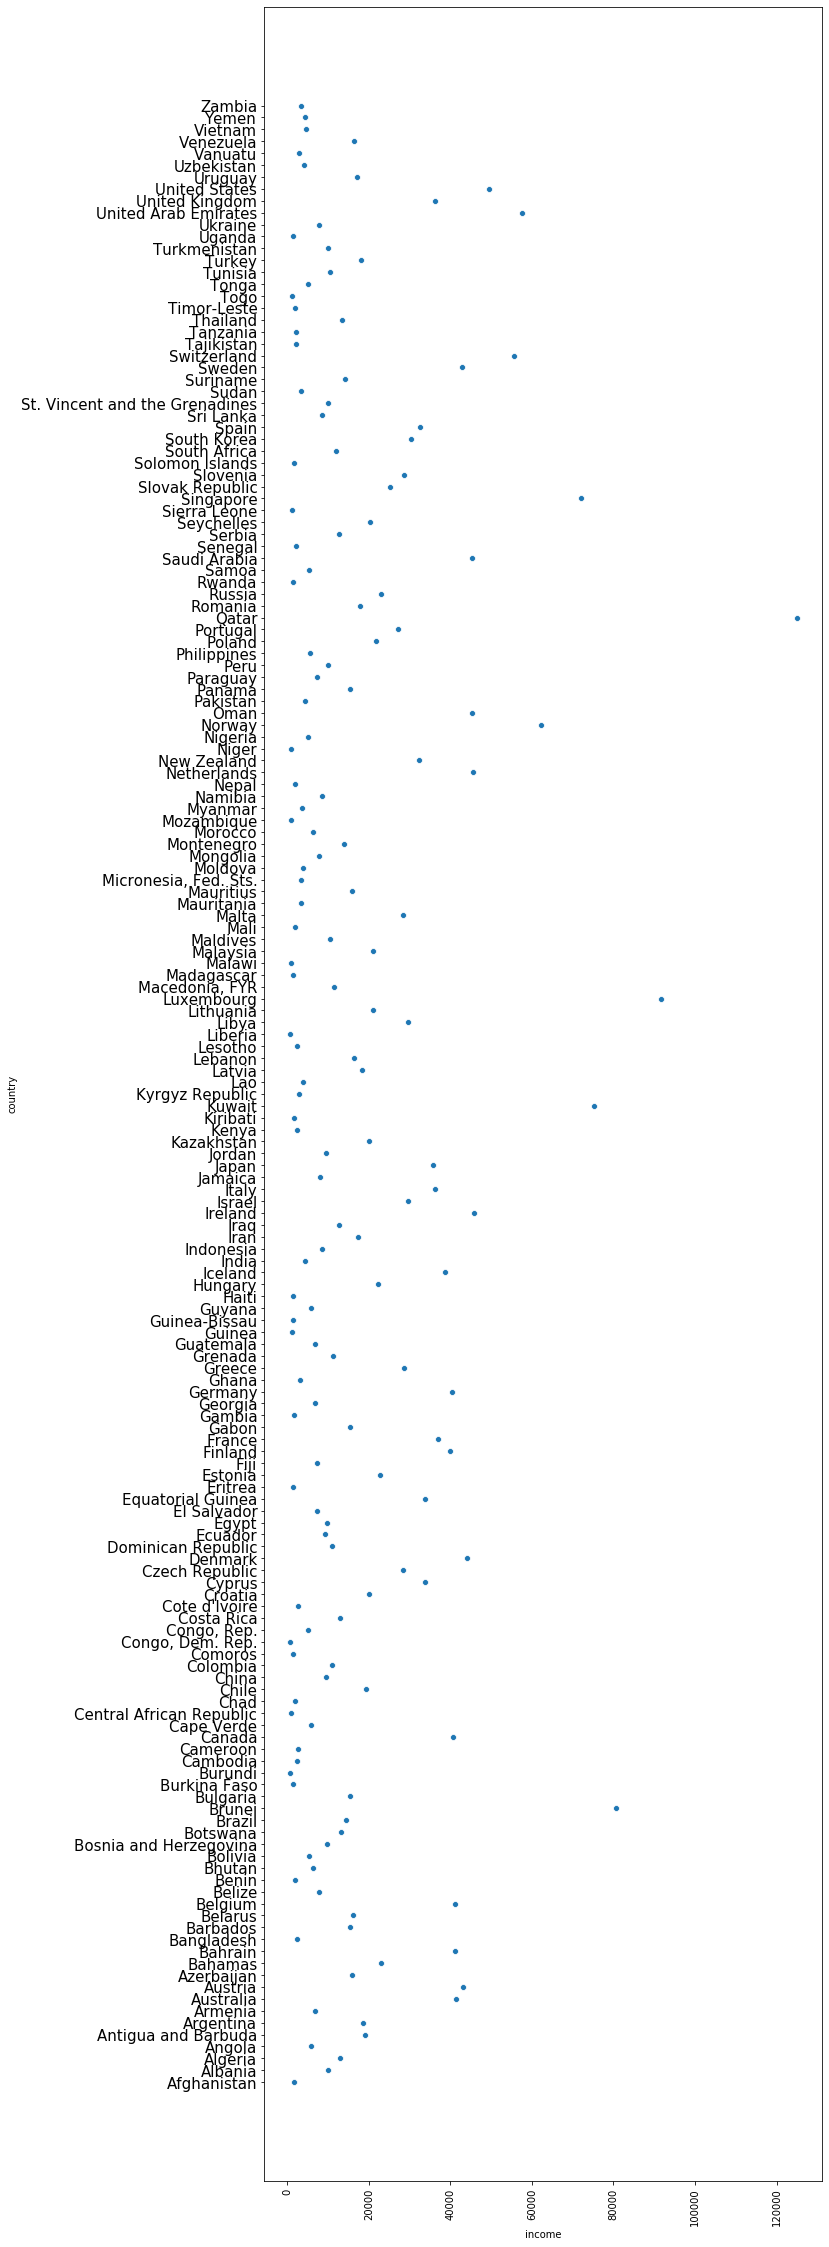

In [181]:
plt.figure(figsize = [10,40]) 
sns.scatterplot(x = 'income', y = 'country', data = ordata)
plt.xticks (rotation = 90)
plt.yticks (fontsize = 15)
plt.show()
#Qatar has the highest net income per person

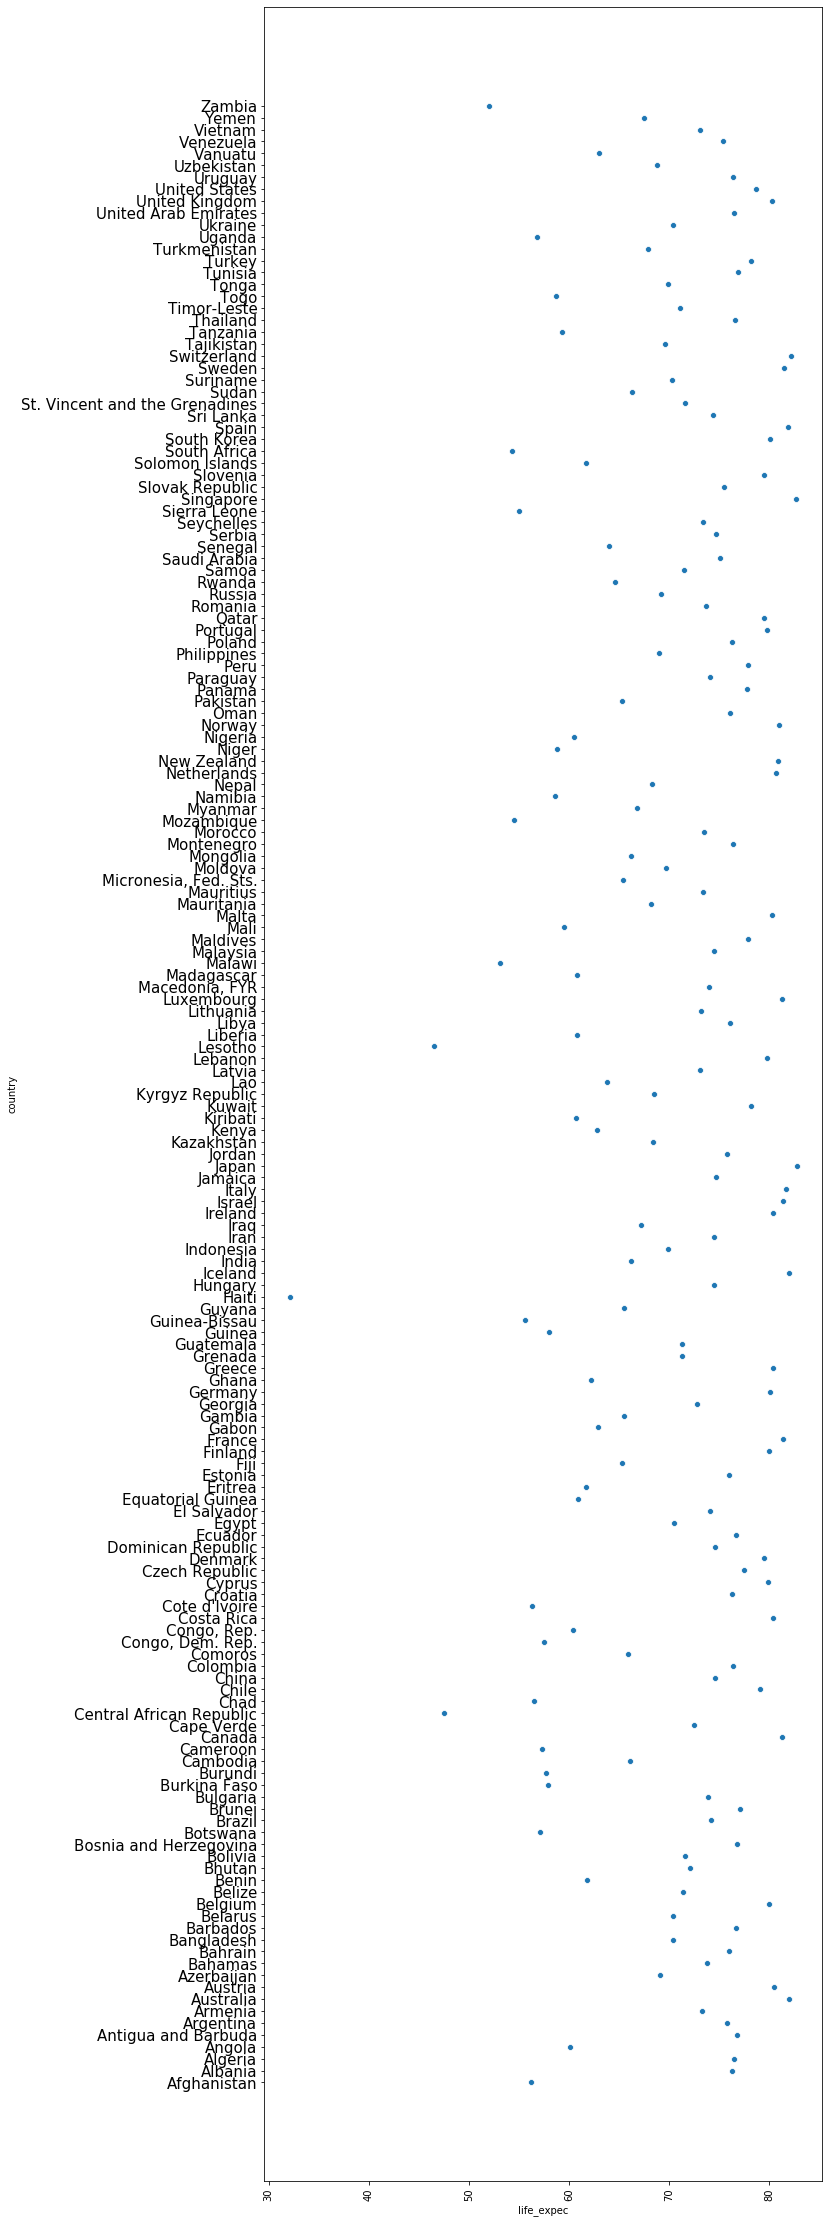

In [182]:
plt.figure(figsize = [10,40]) 
sns.scatterplot(x = 'life_expec', y = 'country', data = ordata)
plt.xticks (rotation = 90)
plt.yticks (fontsize = 15)
plt.show()
#Haiti has life expectancy that is noticeably lower than the rest of the countries. In fact it is the lowest among all the countries.

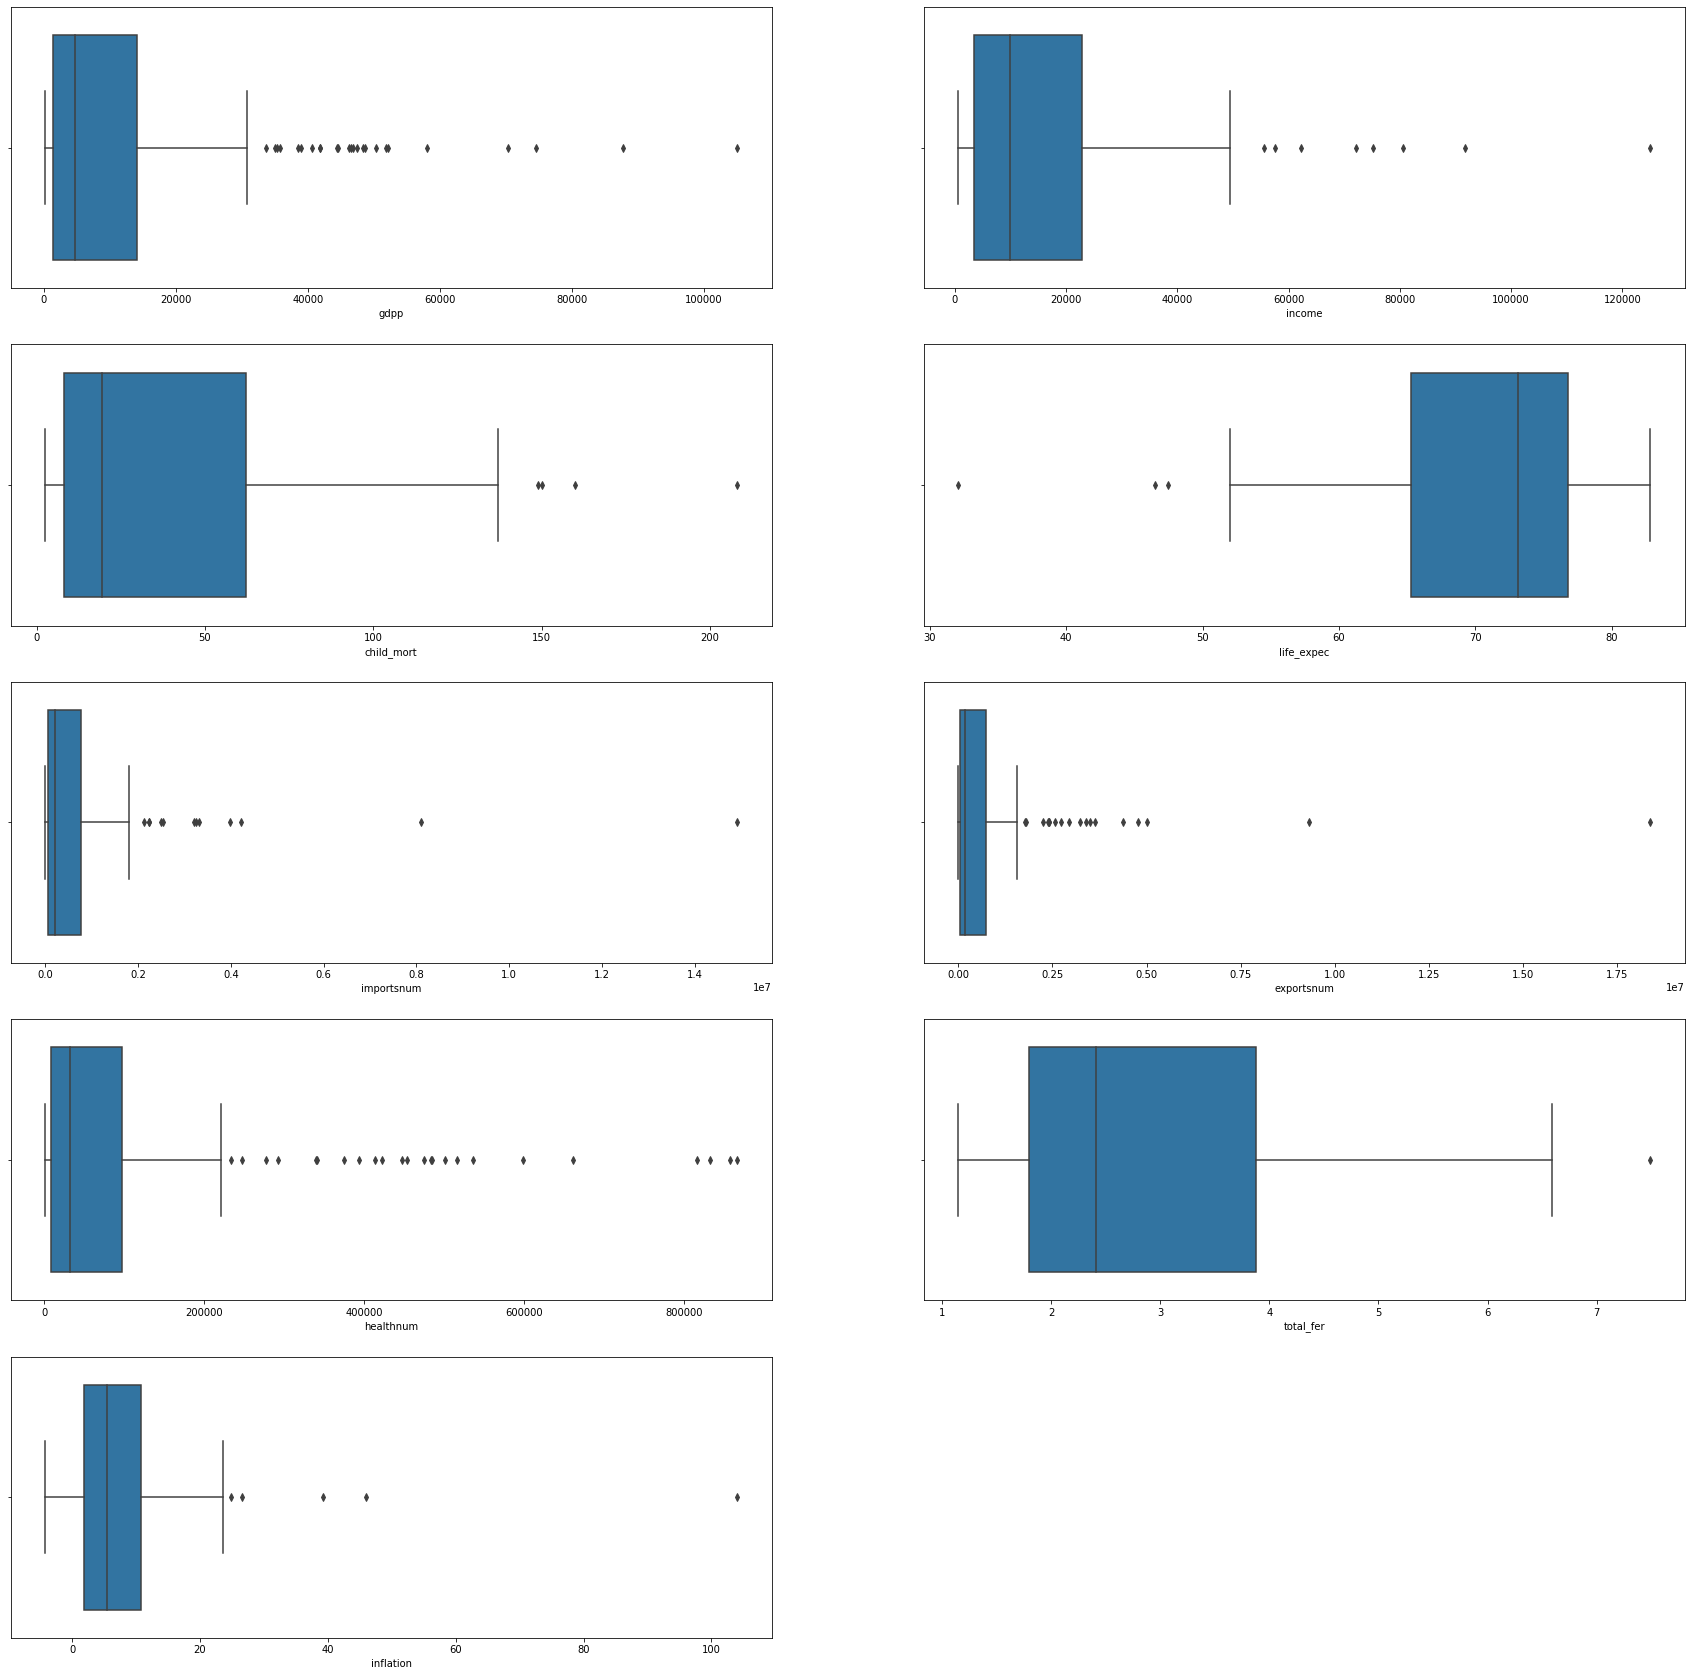

In [183]:
plt.figure(figsize=(30, 30))
plt.subplot(5,2,1)
sns.boxplot(ordata.gdpp)
plt.subplot(5,2,2)
sns.boxplot(ordata.income)
plt.subplot(5,2,3)
sns.boxplot(ordata.child_mort)
plt.subplot(5,2,4)
sns.boxplot(ordata.life_expec)
plt.subplot(5,2,5)
sns.boxplot(ordata.importsnum)
plt.subplot(5,2,6)
sns.boxplot(ordata.exportsnum)
plt.subplot(5,2,7)
sns.boxplot(ordata.healthnum)
plt.subplot(5,2,8)
sns.boxplot(ordata.total_fer)
plt.subplot(5,2,9)
sns.boxplot(ordata.inflation)
plt.show()
#Boxplots show outliers for all the numeric variables.
#They are being retained for now, as they may be needed for business requirements / result in countries that actually need aid being dropped.

In [184]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
#performing Hopkins analysis

In [185]:
hopkins(ordata.drop('country', axis = 1))
#dropped the country column as the Hopkins statistic doesn't accept categorical data as input.
#The value is close to 1, indicating that the data is highly clustered. This is a good sign for cluster analysis.

0.9921836200980426

In [186]:
scaleddata = ordata.drop('country', axis = 1)
#dropping the categorical variable country and storing the resultant dataframe in a new dataframe named scaledata.

In [187]:
scaleddata.head()
#checking that country has been dropped

,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum
0,90.2,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74
1,16.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50
2,27.3,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20
3,119.0,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50
4,10.3,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00


In [188]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaleddata = standard_scaler.fit_transform(scaleddata)
#making the required imports for scaling, fitting and transforming the scaleddata dataframe.

In [189]:
scaleddata = pd.DataFrame(scaleddata)
scaleddata.columns = ["child_mort", "income	", "inflation", "life_expec", 'total_fer', 'gdpp', 'exportsnum', 'importsnum', 'healthnum']
scaleddata.head()
#Checking the head of the dataframe after using the Standard Scaler.

,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum
0,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.432276,-0.565040
1,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218
2,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826
3,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363
4,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771


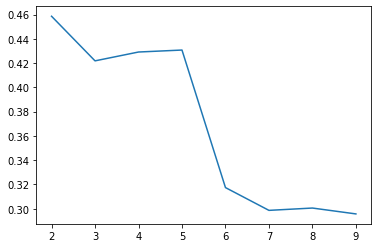

In [190]:

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(scaleddata)
    ss.append([k, silhouette_score(scaleddata, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);
#performing Silhouette analysis to identify the number of clusters needed to be taken. 
#We can see that the Silhouette score reduces from 0.46 for 2 clusters to around 0.42 for 3 clusters, increases marginally when the clusters increase from 3 to 5, and then plunge drastically beyound 5 clusters.
#We can settle for 3 clusters as 4 clusters and 5 clusters don't contribute much to silhouette score, while 6 clusters reduces the score drastically.

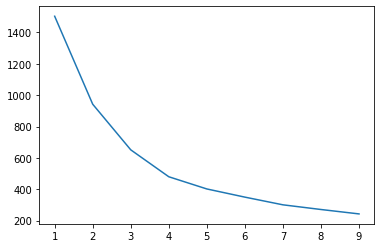

In [191]:

ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50, random_state = 100).fit(scaleddata)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);
#The elbow curve also shows that the curve begins to flatten quite sharply beyond 3 clusters. Hence settling for 3 clusters.

In [192]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 100)
kmean.fit(scaleddata)
#Performing k means analysis with 3 clusters chosen and 50 iterations.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [193]:
col = ordata.columns
col
#Checking the columns of the original dataset which includes country

Index(['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exportsnum', 'importsnum', 'healthnum'],
      dtype='object')

In [194]:
df_km = pd.concat([ordata.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'exportsnum', 'importsnum', 'healthnum', 'cluster_id']
df_km.head()
#Concatenating the cluster_id from the k-means analysis to the original data frame that includes country, and storing it in a dataframe named df_km 

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum,cluster_id
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74,1
1,Albania,16.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50,2
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20,2
3,Angola,119.0,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00,2


In [195]:
df_km.isnull().sum()
#Checking that df_km contains no null values

country       0
child_mort    0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
exportsnum    0
importsnum    0
healthnum     0
cluster_id    0
dtype: int64

In [196]:
df_km['cluster_id'].value_counts()
#Checking the value counts of the 3 clusters 

2    91
1    48
0    28
Name: cluster_id, dtype: int64

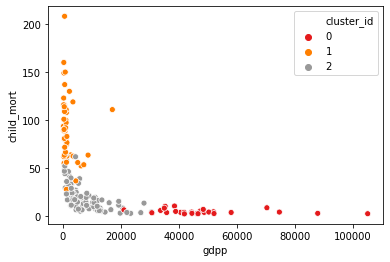

In [197]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
#Taking two variables at a time, examining gdpp and child mort. Cluster 1 looks like it has low gdpp and high child mortality and is in need of aid.

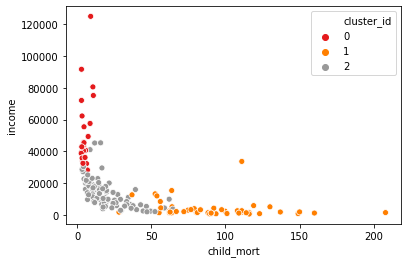

In [198]:
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
#Taking two variables at a time, examining child_mort and income. Cluster 1 looks like it has high child mortality and low income and is in need of aid.

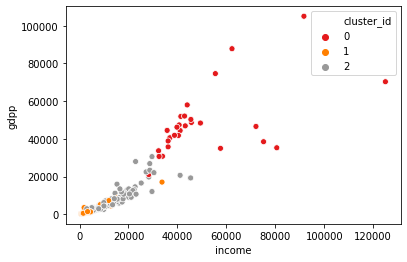

In [199]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')
#Taking two variables at a time, examining income and gdpp. Cluster 1 looks like it has low income and low gdpp and is in need of aid.

In [200]:
df_km.head()
#Checking the head of the df_km dataframe again before heading further. Cluster_id is now included, and the country variable is also included.

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum,cluster_id
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74,1
1,Albania,16.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50,2
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20,2
3,Angola,119.0,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00,2


In [201]:
df_km.drop('country', axis = 1).groupby('cluster_id').mean()
#Taking mean values of all the data after dropping the categorical country variable for further analysis.

,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum
cluster_id,,,,,,,,,
0,5.046429,50178.571429,3.014679,80.514286,1.760714,48114.285714,3.103824e+06,2.581810e+06,432716.321429
1,91.610417,3897.354167,11.911146,59.239583,4.992083,1909.208333,8.790635e+04,8.270288e+04,11482.176458
2,20.357143,13968.021978,7.070549,73.460440,2.235055,7979.912088,3.604149e+05,3.710446e+05,54727.945495


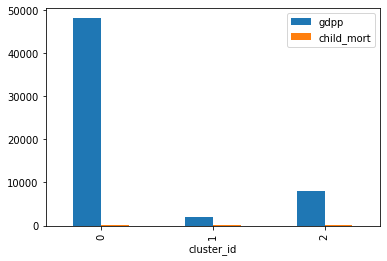

In [202]:
df_km.drop('country', axis = 1)[['gdpp', 'child_mort', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
#Taking two variables at a time, examining gdpp and child_mort. Cluster 1 looks like it has low mean gdpp and similar mean child_mortality and maybe in need of aid.

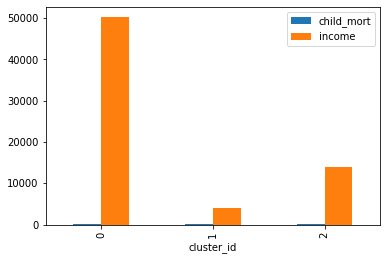

In [203]:
df_km.drop('country', axis = 1)[['child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
#Taking two variables at a time, examining child_mort and income. Cluster 1 looks like it has similar mean child mortality but low mean income and maybe in need of aid.

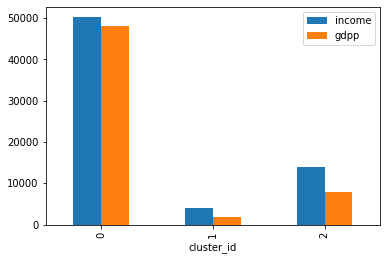

In [204]:
df_km.drop('country', axis = 1)[['income', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
#Taking two variables at a time, examining income and gdpp. Cluster 1 clearly shows lowest mean income and mean gdpp and is in need of aid.

In [205]:
df_km[df_km['cluster_id']==1]['country']
#Identifying countries in cluster 1

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [206]:
df_km[df_km['cluster_id']==1].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])
#Sorting the countries in cluster 1 having low gdpp, low income, and high child mortality.
#These would be the countries that are in the most dire need of aid.

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum,cluster_id
26,Burundi,93.6,764,12.300,57.7,6.26,231,2060.52,9055.2,2679.60,1
88,Liberia,89.3,700,5.470,60.8,5.02,327,6245.70,30280.2,3858.60,1
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,13727.40,16566.4,2641.94,1
112,Niger,123.0,814,2.550,58.8,7.49,348,7725.60,17086.8,1795.68,1
132,Sierra Leone,160.0,1220,17.200,55.0,5.20,399,6703.20,13765.5,5226.90,1
93,Madagascar,62.2,1390,8.790,60.8,4.60,413,10325.00,17759.0,1557.01,1
106,Mozambique,101.0,918,7.640,54.5,5.56,419,13198.50,19357.8,2182.99,1
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,5262.80,11819.0,1775.08,1
94,Malawi,90.5,1030,12.100,53.1,5.31,459,10465.20,16019.1,3024.81,1
50,Eritrea,55.2,1420,11.600,61.7,4.61,482,2308.78,11230.6,1282.12,1


In [207]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#Performing same analysis using hierarchical clustering, making necessary imports.

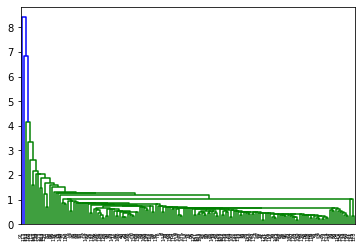

In [208]:
mergings = linkage(scaleddata, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()
#Single linkage doesn't really help us learn anything. Cannot interpret the graph.

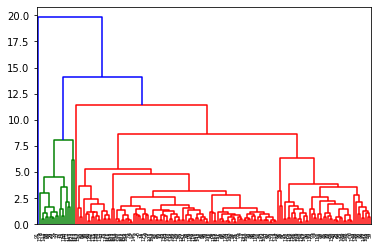

In [209]:
mergings = linkage(scaleddata, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()
#Using complete linkage,we get a clearer picture.

In [210]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels
#Selecting 3 clusters, so cutting the tree at n_clusters =3, as this is the point visually in the dendrogram which seems to have longer stems and naturally larger groupings.

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [211]:
df_km['cluster_labels'] = cluster_labels
df_km.head()
#Now adding the cluster_labels so obtained from the hierarchical analysis to the df_km dataframe.

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,5530.0,24829.7,4191.74,1,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,114520.0,198774.0,26789.50,2,0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,171264.0,140044.0,18598.20,2,0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,219919.0,151437.0,10060.50,1,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,555100.0,718580.0,73566.00,2,0


In [216]:
df_km['cluster_labels'].value_counts()
#This is different from k-means. There are far more countries in cluster 0.

0    148
1     18
2      1
Name: cluster_labels, dtype: int64

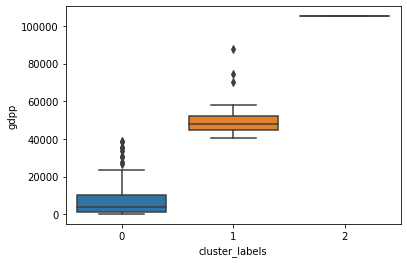

In [212]:
sns.boxplot(x='cluster_labels', y='gdpp', data=df_km)
#Cluster 0 seems to have the lowest gdpp, and is a candidate for aid.

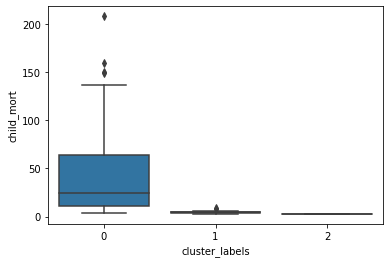

In [213]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df_km)
#Cluster 0 seems to have higher child mortality than the other clusters, and is a candidate for aid.

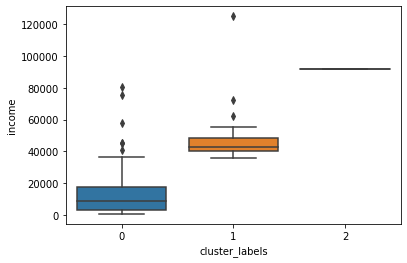

In [214]:
sns.boxplot(x='cluster_labels', y='income', data=df_km)
#Cluster 0 seems to have lower income than the other clusters, and is a candidate for aid.

In [215]:
df_km[df_km['cluster_labels']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])
#Again, identifying those countries within cluster 0 which have the loweest gdp, lowest income, and highest child mortality and sorting the dataframe.

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exportsnum,importsnum,healthnum,cluster_id,cluster_labels
26,Burundi,93.6,764,12.300,57.7,6.26,231,2060.52,9055.2,2679.60,1,0
88,Liberia,89.3,700,5.470,60.8,5.02,327,6245.70,30280.2,3858.60,1,0
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,13727.40,16566.4,2641.94,1,0
112,Niger,123.0,814,2.550,58.8,7.49,348,7725.60,17086.8,1795.68,1,0
132,Sierra Leone,160.0,1220,17.200,55.0,5.20,399,6703.20,13765.5,5226.90,1,0
93,Madagascar,62.2,1390,8.790,60.8,4.60,413,10325.00,17759.0,1557.01,1,0
106,Mozambique,101.0,918,7.640,54.5,5.56,419,13198.50,19357.8,2182.99,1,0
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,5262.80,11819.0,1775.08,1,0
94,Malawi,90.5,1030,12.100,53.1,5.31,459,10465.20,16019.1,3024.81,1,0
50,Eritrea,55.2,1420,11.600,61.7,4.61,482,2308.78,11230.6,1282.12,1,0


Both k-means and hierarchical clustering help us conclude the same thing, as the 5 countries that are shortlisted for financial aid are the same using both the procedures.
Under k-means, the countries that need aid the most, are those that come under cluster 1 of the analysis - namely, Burundi, Liberia, Democratic Republic of Congo, Niger, and Sierra Leone.
Under hierarchical clustering, the countries that need aid the most, are those that come under cluster 0 of the analysis - but again, the same as in k-means, namely, Burundi, Liberia, Democratic Republic of Congo, Niger, and Sierra Leone.
Intrestingly, all these countries are in Africa, which suggests that countries within the same geographical location suffer from similar problems - low gdpp, low income, and high child mortality. 
